Workflow:
- read in messages
- tokenize messages / preprocess - this involves: identifying emotes (e.g. pokiHype), emoticons (<3, :), etc), slang (sadge, etc)
- put messages into some kind of sentiment analyzer 

In [1]:
import pandas as pd

In [59]:
df = pd.read_csv("./tyler1_updated.csv")

In [60]:
msgs = df['message']

In [61]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [62]:
posEmotesSlang = ['pokihype', 'pokiw', 'pokipride', 'pokiwater', 'pokint', 'pokiwow', 'pokiya', 'pokidrool',
                 'pokio', 'pokiheart', 'pokifree', 'pokisub', 'pokigift', 'pokikek', 'pokigood', 'pokiaww',
                  'pokihey', 'pokishy', 'pokih', 'pokil', 'pokihypers', 'pokimoney', 'pokiflex', 'pokiuwu',
                  'pogu', 'pog', 'poggers', 'pogchamp', 'tyler1ssj', 'tyler1bb', 'tyler1ayy', 
                  'tyler1good', 'tyler1champ', 'tyler1pride', 'drhgpog', 'drhghypers', 'drhgsmile', 'drhgok', 'drhgpepega', 
                 ]

In [63]:
negEmotesSlang = ['sadge', 'monkas', 'pokiree', 'pokibruh', 'pokipuke', 'pokiknife', 'pokiban', 'pokigun', 'pokiyikes', 
                 'pokicry', 'pokiweird', 'weirdchamp', 'monkaw', 'monka', 'monkas', 'inting', 'malding',
                 'tyler1ban', 'tyler1sleeper', 'tyler1bruh', 'tyler1monk', 'drhgweird', 'drhgehh', 'drhgwtf', ]

In [64]:
to_extend_lexicon_file="./twitch_lexicon.txt"

In [65]:
with open(to_extend_lexicon_file, mode='w') as f:
    for entry in posEmotesSlang:
        outString = entry + "\t" + "1.0" + "\n"
        f.write(outString)
    for entry in negEmotesSlang:
        outString = entry + "\t" + "-1.0" + "\n"
        f.write(outString)

In [66]:
# add on the original lexicon file
lex_new = open(to_extend_lexicon_file, "r")
data1 = lex_new.read()
lex_new.close()

lex_old = open("../anaconda3/envs/nlp/lib/python3.8/site-packages/vaderSentiment/vader_lexicon.txt", "r")
data2 = lex_old.read()
lex_old.close()

combined_data = data1 + data2

combined_lex = open("../anaconda3/envs/nlp/lib/python3.8/site-packages/vaderSentiment/vader_lexicon_extended.txt", "w")
combined_lex.write(combined_data)
combined_lex.close()

In [67]:
analyzer = SentimentIntensityAnalyzer("vader_lexicon_extended.txt")

In [68]:
to_concat = {'neg':[], 'neu':[], 'pos':[], 'compound':[]}
for msg in msgs:
    try:
        score = analyzer.polarity_scores(msg)
        for key, val in score.items():
            to_concat[key].append(val)
    except Exception as e:
        # simply append the values from the last item. We do this so that we don't end up with blank entries
        for key, val in score.items():
            to_concat[key].append(val)
        print(e, msg)
        continue

to_concat_df = pd.DataFrame(to_concat)

full_df = pd.concat([df, to_concat_df], axis=1)

'float' object is not iterable nan
'float' object is not iterable nan
'float' object is not iterable nan
'float' object is not iterable nan
'float' object is not iterable nan


In [69]:
full_df

,dt,channel,username,message,neg,neu,pos,compound
0,2021-05-06 18:28:43,loltyler1,tee_kaylol,@3SHENOP short sighted doesnt matter if you're...,0.097,0.903,0.000,-0.0191
1,2021-05-06 18:28:44,loltyler1,rorodelablanca,pepo,0.000,1.000,0.000,0.0000
2,2021-05-06 18:28:44,loltyler1,i__am__jon,They going to base,0.000,1.000,0.000,0.0000
3,2021-05-06 18:28:44,loltyler1,ib_0p,holy fuck,0.778,0.222,0.000,-0.5423
4,2021-05-06 18:28:44,loltyler1,bureng_,2 ur mom's 4Head,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
23955,2021-05-06 20:37:34,loltyler1,xqcs_waifu,2324 PICK DOGSHIT TOP CHAMP LULW CRY ABOUT ROA...,0.165,0.560,0.274,0.3680
23956,2021-05-06 20:37:34,loltyler1,itscakebruh,!ran k,0.000,1.000,0.000,0.0000
23957,2021-05-06 20:37:34,loltyler1,mrmarepoto,BigBrother RUN IT DOWN MID,0.000,1.000,0.000,0.0000
23958,2021-05-06 20:37:35,loltyler1,nemesisbd,Pog,0.000,0.000,1.000,0.2500


In [70]:
full_df.to_csv('t1_updated_chat_with_sentiment.csv')

In [71]:
hgg_df = pd.read_csv('h_gg_chat_with_sentiment.csv')
t1_df = pd.read_csv('t1_updated_chat_with_sentiment.csv')
poki_df = pd.read_csv('poki_updated_chat_with_sentiment.csv')

In [72]:
import matplotlib.pyplot as plt

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f8285377b20>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f8285377970>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f8285377940>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f82853862e0>}

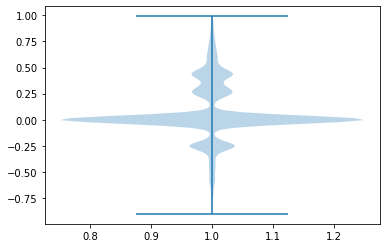

In [82]:
# first, visualize the differences in sentiment:
plt.violinplot([x for x in hgg_df['compound']])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f828c42a6a0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f828c42a1f0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f8287492940>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f828c4c3100>}

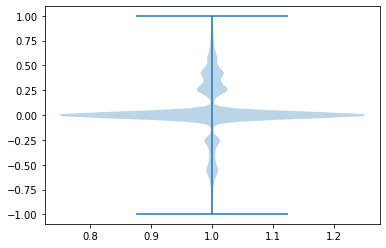

In [83]:
plt.violinplot([x for x in t1_df['compound']])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8285493b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f82854a0220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f82854937c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f82854a08e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f82854a0c40>],
 'means': []}

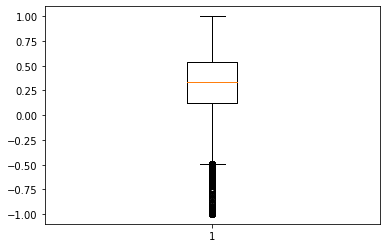

In [81]:
plt.boxplot([x for x in poki_df['compound'] if x!=0])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f828757cfd0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f828757ce20>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f828758a4f0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f828758a7f0>}

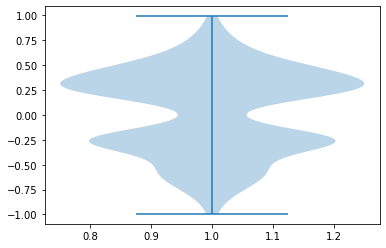

In [22]:
plt.violinplot([x for x in t1_df['compound'] if x != 0])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f9e67243ac0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f9e6725a100>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f9e67243f40>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f9e671b8280>}

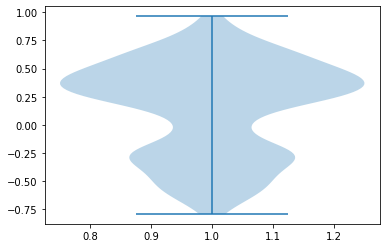

In [26]:
plt.violinplot([x for x in doublelift_df['compound'] if x != 0])

In [ ]:
# filter out "noise" events that are just 0s

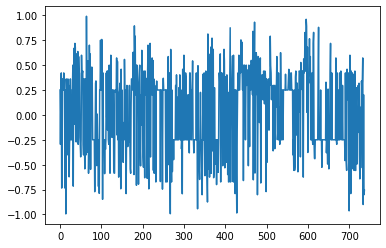

In [44]:
# now, show over time
plt.plot([x for x in t1_df['compound'] if x != 0])

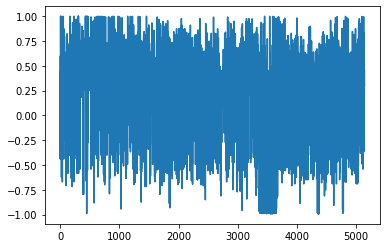

In [59]:
plt.plot([x for x in poki_df['compound'] if x != 0])

In [50]:
import numpy as np

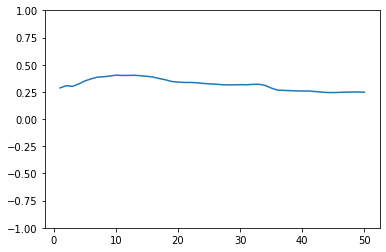

In [55]:
msgs_no_neutral = [x for x in poki_df['compound'] if x != 0]
msg_averages = []
for i in range(int(len(msgs_no_neutral) / 50)):
    msg_averages.append(np.mean(msgs_no_neutral[i:i*50]))
plt.plot(msg_averages)
plt.ylim([-1, 1])
plt.show()

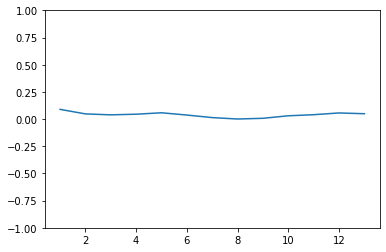

In [58]:
msgs_no_neutral = [x for x in t1_df['compound'] if x != 0]
msg_averages = []
for i in range(int(len(msgs_no_neutral) / 50)):
    msg_averages.append(np.mean(msgs_no_neutral[i:i*50]))
plt.plot(msg_averages)
plt.ylim([-1, 1])
plt.show()

In [47]:
# investigate the negative options:
poki_df[poki_df['compound'] < -0.9].iloc[100:130]

,Unnamed: 0,dt,channel,username,message,neg,neu,pos,compound
11206,11206,2021-04-18 16:20:01,pokimane,widepeeposergio,WideMimi HYPERCLAP NO STREAMER WideMimi HYPERC...,0.494,0.506,0.0,-0.9614
11208,11208,2021-04-18 16:20:04,pokimane,awesomehasser1945,WideHardo Clap NO STREAMER WideHardo Clap NO S...,0.485,0.515,0.0,-0.9939
11211,11211,2021-04-18 16:20:05,pokimane,alexgris_,WideMimi HYPERCLAP NO STREAMER WideMimi HYPERC...,0.494,0.506,0.0,-0.9761
11213,11213,2021-04-18 16:20:05,pokimane,rektmate23,WideHardo Clap NO STREAMER WideHardo Clap NO S...,0.494,0.506,0.0,-0.9883
11224,11224,2021-04-18 16:20:09,pokimane,pogi52,WideHardo Clap NO STREAMER WideHardo Clap NO S...,0.494,0.506,0.0,-0.9883
11231,11231,2021-04-18 16:20:14,pokimane,pogi52,WideHardo Clap NO STREAMER WideHardo Clap NO S...,0.488,0.512,0.0,-0.9883
11232,11232,2021-04-18 16:20:14,pokimane,awesomehasser1945,WideHardo Clap NO STREAMER WideHardo Clap NO S...,0.494,0.506,0.0,-0.9899
11239,11239,2021-04-18 16:20:19,pokimane,awesomehasser1945,WideHardo Clap NO STREAMER WideHardo Clap NO S...,0.494,0.506,0.0,-0.9883
11249,11249,2021-04-18 16:20:27,pokimane,fur10us_gg,WideMimi HYPERCLAP NO STREAMER WideMimi HYPERC...,0.494,0.506,0.0,-0.9805
11252,11252,2021-04-18 16:20:28,pokimane,drakorycz,WideHardo Clap NO STREAMER WideHardo Clap NO S...,0.494,0.506,0.0,-0.9883


In [41]:
poki_df.iloc[11237].message

'WideMimi HYPERCLAP NO STREAMER WideMimi HYPERCLAP NO STREAMER WideMimi HYPERCLAP NO STREAMER WideMimi HYPERCLAP NO STREAMER'